# SpatialMouse - Collect data from saturation analysis and plot into one plot

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = Path("/home/hpc/johannes.wirth/data/experiments/37_46/sequencing_data/fastq")

In [3]:
data_paths = data_dir.glob("Sample_*/out/subsampling/*_saturation.csv")
data = {p.stem.split("_")[1]: pd.read_csv(p) for p in data_paths}
data = pd.concat(data).reset_index(level=0).reset_index(drop=True).rename(columns={"level_0": "sample"})
data = data.sort_values('sample')

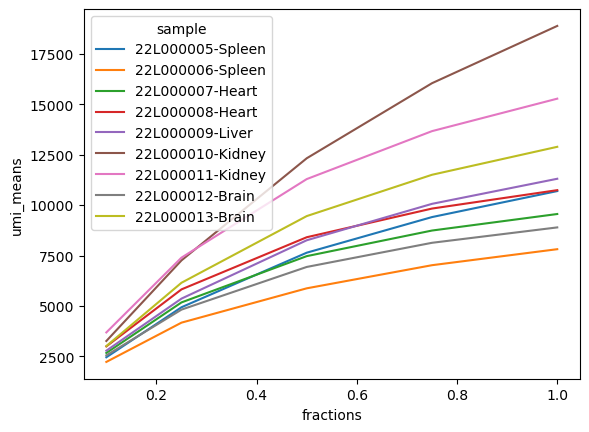

In [4]:
sns.lineplot(data=data, x="fractions", y="umi_means", hue="sample")
plt.savefig("figures/lineplot_saturation_all.pdf", bbox_inches="tight")
plt.show()